In [662]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
from sklearn.preprocessing import MinMaxScaler


In [355]:
import pandas as pd
import os

# List of CSV filenames
file_names = [
    '2010-11 NBA - Sheet1.csv', '2003-04 NBA - Sheet1.csv',
    '2004-05 NBA - Sheet1 (1).csv', '2009-10 NBA - Sheet1.csv',
    '2021-22 NBA - Sheet1.csv', '2018-19 NBA - Sheet1 (1).csv',
    '2013-14 NBA - Sheet1.csv', '2019-20 NBA - Sheet1.csv',
    '2012-13 NBA - Sheet1.csv', '2020-21 NBA - Sheet1.csv',
    '2016-17 NBA - Sheet1.csv', '2017-18 NBA - Sheet1.csv',
    '2005-06 NBA - Sheet1.csv', '2007-08 NBA - Sheet1.csv',
    '2015-16 NBA - Sheet1.csv', '2014-15 NBA - Sheet1 (1).csv',
    '2011-12 NBA - Sheet1.csv', '2008-09 NBA - Sheet1.csv',
    '2006-07 NBA - Sheet1.csv', '2002-03 NBA - Sheet1.csv'
]

# Optional: set folder if files are in a specific subdirectory
folder = '.'  # or something like 'nba_data'

# Read and combine all CSVs
all_dataframes = []
for file in file_names:
    path = os.path.join(folder, file)
    df = pd.read_csv(path)
    df['Season'] = file.split(' ')[0]  # Add a 'Season' column from filename
    all_dataframes.append(df)

# Combine all into a single DataFrame
allstar_stats = pd.concat(all_dataframes, ignore_index=True)

# Preview the combined DataFrame
allstar_stats

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Season
0,Ray Allen,SG,35,BOS,80,80,36.1,6.0,12.2,0.491,...,0.6,2.8,3.4,2.7,1.0,0.2,1.5,1.8,16.5,2010-11
1,Carmelo Anthony,SF,26,TOT,77,77,35.7,8.9,19.5,0.455,...,1.5,5.8,7.3,2.9,0.9,0.6,2.7,2.9,25.6,2010-11
2,Chris Bosh,PF,26,MIA,77,77,36.3,6.8,13.7,0.496,...,1.8,6.5,8.3,1.9,0.8,0.6,1.8,2.2,18.7,2010-11
3,Kobe Bryant,SG,32,LAL,82,82,33.9,9.0,20.0,0.451,...,1.0,4.1,5.1,4.7,1.2,0.1,3.0,2.1,25.3,2010-11
4,Tim Duncan,C,34,SAS,76,76,28.4,5.5,11.0,0.500,...,2.2,6.7,8.9,2.7,0.7,1.9,1.6,1.6,13.4,2010-11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,Paul Pierce,SG,25,BOS,79,79,39.2,8.4,20.2,0.416,...,1.3,6.0,7.3,4.4,1.8,0.8,3.6,2.9,25.9,2002-03
516,Peja Stojaković,SF,25,SAC,72,72,34.0,6.9,14.4,0.481,...,0.8,4.7,5.5,2.0,1.0,0.1,1.4,2.0,19.2,2002-03
517,Antoine Walker,PF,26,BOS,78,78,41.5,7.7,19.9,0.388,...,1.3,5.9,7.2,4.8,1.5,0.4,3.3,2.8,20.1,2002-03
518,Ben Wallace,C,28,DET,73,73,39.4,2.9,6.0,0.481,...,4.0,11.4,15.4,1.6,1.4,3.2,1.2,2.5,6.9,2002-03


In [359]:
sql_connect = sqlite3.connect('nba.sqlite')
common_player_info = pd.read_sql_query('select * from common_player_info', sql_connect)
common_player_info =common_player_info.drop(columns=['display_fi_last','jersey','team_abbreviation','team_city', 'display_first_last','last_affiliation','playercode','player_slug'])


In [361]:
team_gamests = pd.read_sql_query("select season_id, team_name_home,game_date, season_type,plus_minus_away, plus_minus_home,pts_away from game where game_date > '2002 -11-01 00:00:00'",sql_connect)
salary= pd.read_csv(r'NBASalaryData03-17.csv')
salary.columns = salary.columns.str.lower().str.strip()
allstar_stats.columns = allstar_stats.columns.str.lower().str.strip()


In [363]:
salary.columns = salary.columns.str.lower().str.strip()
allstar_stats.columns = allstar_stats.columns.str.lower().str.strip()


In [365]:
#adding 20 to the season column to merge tables
allstar_stats['season'] = allstar_stats['season'].apply(lambda s: s[:4] + '-' + '20' + s[-2:])


In [371]:
clt = allstar_stats[allstar_stats['player']== 'Kemba Walker']
clt

,player,pos,age,tm,g,gs,mp,fg,fga,fg%,...,orb,drb,trb,ast,stl,blk,tov,pf,pts,season
153,Kemba Walker,PG,28,CHO,82,82,34.9,8.9,20.5,0.434,...,0.6,3.8,4.4,5.9,1.2,0.4,2.6,1.6,25.6,2018-2019
202,Kemba Walker,PG,29,BOS,56,56,31.1,6.8,15.9,0.425,...,0.6,3.2,3.9,4.8,0.9,0.5,2.1,1.6,20.4,2019-2020
279,Kemba Walker,PG,26,CHO,79,79,34.7,8.1,18.3,0.444,...,0.6,3.3,3.9,5.5,1.1,0.3,2.1,1.5,23.2,2016-2017
307,Kemba Walker,PG,27,CHO,80,80,34.2,7.4,17.0,0.431,...,0.4,2.7,3.1,5.6,1.1,0.3,2.2,1.2,22.1,2017-2018


In [413]:

matched_players = allstar_stats.merge(salary, on=['player','season'], how='inner')
#matched_players.drop(columns='
#testing to make sure data comes back correct
allstar_salary = matched_players[matched_players['player'] == 'Kevin Garnett']

In [417]:
matched_players = matched_players.sort_values('team')


In [419]:
matched_players['season'].max()

'2017-2018'

In [421]:
matched_players['season'].min()

'2002-2003'

In [415]:
sum_teams = matched_players['team'].value_counts()
sum_teams

team
Boston Celtics            24
Miami Heat                24
San Antonio Spurs         20
Los Angeles Lakers        17
Atlanta Hawks             16
Houston Rockets           16
Phoenix Suns              15
Cleveland Cavaliers       15
Detroit Pistons           15
Oklahoma City Thunder     14
Toronto Raptors           14
LA Clippers               13
Golden State Warriors     13
Indiana Pacers            13
Washington Wizards        12
Orlando Magic             11
Dallas Mavericks          11
Chicago Bulls             11
Portland Trail Blazers    10
New York Knicks           10
New Jersey Nets            9
New Orleans Hornets        9
Minnesota Timberwolves     9
Memphis Grizzlies          7
Utah Jazz                  7
New Orleans Pelicans       6
Denver Nuggets             5
Seattle SuperSonics        5
Philadelphia 76ers         5
Sacramento Kings           3
Brooklyn Nets              2
Milwaukee Bucks            2
Charlotte Hornets          2
Charlotte Bobcats          1
Name: cou

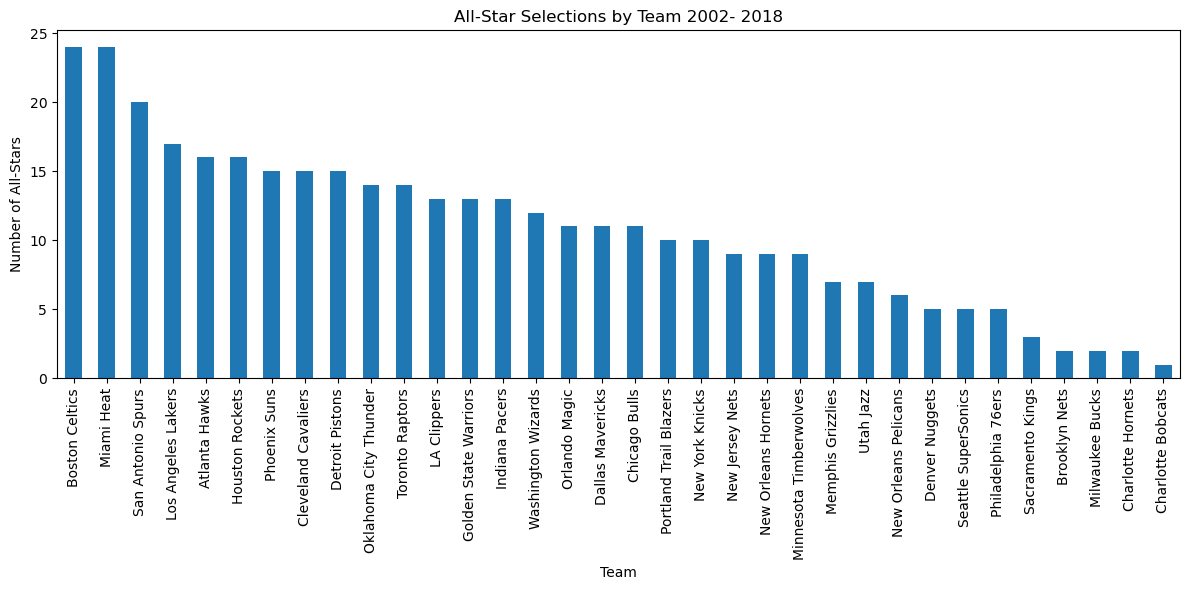

In [425]:
sum_teams.plot(kind='bar', figsize=(12,6), title='All-Star Selections by Team 2002- 2018')
plt.xlabel('Team')
plt.ylabel('Number of All-Stars')
plt.tight_layout()
plt.show()


In [439]:
cor_map = matched_players.select_dtypes(include='number').corr()
cor_map

,age,g,gs,mp,fg,fga,fg%,3p,3pa,3p%,...,orb,drb,trb,ast,stl,blk,tov,pf,pts,salary
age,1.000000,-0.111819,-0.124159,-0.353342,-0.272906,-0.239322,-0.046756,-0.026761,-0.037895,-0.001064,...,-0.158757,-0.094762,-0.121187,-0.032348,-0.242685,-0.082462,-0.199429,-0.243175,-0.299108,0.434744
g,-0.111819,1.000000,0.996497,0.259444,0.069332,0.041635,0.057384,0.085476,0.066203,0.064992,...,0.084209,0.107084,0.104056,0.019539,0.099247,0.025358,-0.098736,0.083663,0.084327,-0.148460
gs,-0.124159,0.996497,1.000000,0.259037,0.070474,0.040850,0.061996,0.094277,0.074954,0.068957,...,0.085129,0.109750,0.106279,0.023981,0.096977,0.024269,-0.096117,0.080038,0.087513,-0.135707
mp,-0.353342,0.259444,0.259037,1.000000,0.456276,0.520307,-0.206691,0.138290,0.177166,0.084111,...,0.015935,0.054602,0.043177,0.202926,0.398754,-0.095689,0.318374,0.074856,0.490606,-0.188678
fg,-0.272906,0.069332,0.070474,0.456276,1.000000,0.911449,0.095364,0.158757,0.189921,0.083407,...,-0.055949,0.049435,0.015666,0.010852,0.119536,-0.044975,0.348122,0.065947,0.938199,0.186812
fga,-0.239322,0.041635,0.040850,0.520307,0.911449,1.000000,-0.307523,0.364707,0.424317,0.184054,...,-0.248727,-0.134550,-0.181142,0.132420,0.239959,-0.236866,0.392739,-0.022151,0.918691,0.136174
fg%,-0.046756,0.057384,0.061996,-0.206691,0.095364,-0.307523,1.000000,-0.507593,-0.571612,-0.286404,...,0.497336,0.440826,0.484010,-0.322074,-0.324934,0.458480,-0.139131,0.234106,-0.057302,0.105124
3p,-0.026761,0.085476,0.094277,0.138290,0.158757,0.364707,-0.507593,1.000000,0.986070,0.535559,...,-0.606699,-0.428789,-0.512606,0.310988,0.282194,-0.519701,0.165503,-0.270313,0.357300,0.085330
3pa,-0.037895,0.066203,0.074954,0.177166,0.189921,0.424317,-0.571612,0.986070,1.000000,0.512836,...,-0.618897,-0.436524,-0.522380,0.341426,0.332858,-0.533318,0.219754,-0.265862,0.392248,0.104148
3p%,-0.001064,0.064992,0.068957,0.084111,0.083407,0.184054,-0.286404,0.535559,0.512836,1.000000,...,-0.484207,-0.368369,-0.426219,0.250140,0.114677,-0.422227,0.031766,-0.240016,0.175720,-0.023518


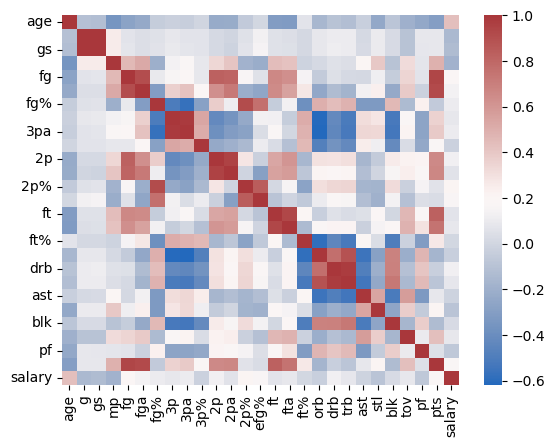

In [606]:
sns.heatmap(cor_map, cmap='vlag')
plt.show()

In [443]:
nba_wins = pd.read_csv(r'Team_records.csv')
nba_wins

,season,Lg,team,wins,loss,win_loss_pctg,finish,simple_rating_system,offensive_rating,relative_offensive_rating,deffense_rtg,relative_defensive_rating,Playoffs,top_ws_player,win_shares
0,2017-2018,NBA,Boston Celtics,29,10,0.744,1,4.38,108.0,0.2,102.8,-5.0,NaN,K. Irving,5.7
1,2016-2017,NBA,Boston Celtics*,53,29,0.646,1,2.25,111.2,2.4,108.4,-0.4,Lost E. Conf. Finals,I. Thomas,12.5
2,2015-2016,NBA,Boston Celtics*,48,34,0.585,2,2.84,106.8,0.4,103.6,-2.8,Lost E. Conf. 1st Rnd.,I. Thomas,9.7
3,2014-2015,NBA,Boston Celtics*,40,42,0.488,2,-0.40,104.7,-0.9,104.5,-1.1,Lost E. Conf. 1st Rnd.,T. Zeller,6.5
4,2013-2014,NBA,Boston Celtics,25,57,0.305,4,-4.97,102.9,-3.8,107.7,1.0,NaN,B. Bass,5.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1478,1999-2000,NBA,Vancouver Grizzlies,22,60,0.268,7,-5.10,102.3,-1.8,108.5,4.4,NaN,S. Abdur-Rahim,8.8
1479,1998-2099,NBA,Vancouver Grizzlies,8,42,0.160,7,-8.94,98.4,-3.8,107.9,5.7,NaN,S. Abdur-Rahim,4.6
1480,1997-2098,NBA,Vancouver Grizzlies,19,63,0.232,6,-7.47,104.1,-0.9,112.0,7.0,NaN,S. Abdur-Rahim,6.9
1481,1996-2097,NBA,Vancouver Grizzlies,14,68,0.171,7,-10.17,100.3,-6.4,111.8,5.1,NaN,G. Anthony,3.5


In [532]:
filtered_data = nba_wins[nba_wins['season'] >= '2002-2003']

filtered_data['season'].unique()


array(['2017-2018', '2016-2017', '2015-2016', '2014-2015', '2013-2014',
       '2012-2013', '2011-2012', '2010-2011', '2009-2010', '2008-2009',
       '2007-2008', '2006-2007', '2005-2006', '2004-2005', '2003-2004',
       '2002-2003'], dtype=object)

In [676]:
filtered_data.groupby('team')['season'].nunique()


team
Atlanta Hawks                        16
Boston Celtics                       16
Brooklyn Nets                         6
Charlotte Bobcats                    10
Charlotte Hornets                     4
Chicago Bulls                        16
Cleveland Cavaliers                  16
Dallas Mavericks                     16
Denver Nuggets                       16
Detroit Pistons                      16
Golden State Warriors                16
Houston Rockets                      16
Indiana Pacers                       16
Los Angeles Clippers                 16
Los Angeles Lakers                   16
Memphis Grizzlies                    16
Miami Heat                           16
Milwaukee Bucks                      16
Minnesota Timberwolves               16
New Jersey Nets                      10
New Orleans Hornets                   9
New Orleans Pelicans                  5
New Orleans/Oklahoma City Hornets     2
New York Knicks                      16
Oklahoma City Thunder              

In [588]:
filtered_data['team'] = filtered_data['team'].str.replace('*', '', regex=False)
filtered_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 478 entries, 0 to 1475
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   season                     478 non-null    object 
 1   Lg                         478 non-null    object 
 2   team                       478 non-null    object 
 3   wins                       478 non-null    int64  
 4   loss                       478 non-null    int64  
 5   win_loss_pctg              478 non-null    float64
 6   finish                     478 non-null    int64  
 7   simple_rating_system       478 non-null    float64
 8   offensive_rating           478 non-null    float64
 9   relative_offensive_rating  478 non-null    float64
 10  deffense_rtg               478 non-null    float64
 11  relative_defensive_rating  478 non-null    float64
 12  Playoffs                   240 non-null    object 
 13  top_ws_player              478 non-null    object 
 14

/var/folders/px/2jjd4x7j5n9gx8819mdg0rgw0000gq/T/ipykernel_86059/1229014954.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['team'] = filtered_data['team'].str.replace('*', '', regex=False)


In [596]:
filtered_data.season.max()

'2017-2018'

In [598]:
filtered_data.season.min()

'2002-2003'

In [674]:
matched_wins = matched_players.merge(filtered_data, on=['team','season'], how='left')
matched_wins['win_shares'] = pd.to_numeric(matched_wins['win_shares'], errors='coerce')



In [612]:
matched_wins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 46 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   player                     366 non-null    object 
 1   pos                        366 non-null    object 
 2   age                        366 non-null    int64  
 3   tm                         366 non-null    object 
 4   g                          366 non-null    int64  
 5   gs                         366 non-null    int64  
 6   mp                         366 non-null    float64
 7   fg                         366 non-null    float64
 8   fga                        366 non-null    float64
 9   fg%                        366 non-null    float64
 10  3p                         366 non-null    float64
 11  3pa                        366 non-null    float64
 12  3p%                        358 non-null    float64
 13  2p                         366 non-null    float64

In [602]:
cor_map_wins = matched_wins.select_dtypes(include='number').corr()
cor_map_wins

,age,g,gs,mp,fg,fga,fg%,3p,3pa,3p%,...,salary,wins,loss,win_loss_pctg,finish,simple_rating_system,offensive_rating,relative_offensive_rating,deffense_rtg,relative_defensive_rating
age,1.000000,-0.111819,-0.124159,-0.353342,-0.272906,-0.239322,-0.046756,-0.026761,-0.037895,-0.001064,...,0.434744,0.077171,-0.030023,0.064216,-0.089424,0.026088,0.010529,0.004538,-0.023873,-0.034143
g,-0.111819,1.000000,0.996497,0.259444,0.069332,0.041635,0.057384,0.085476,0.066203,0.064992,...,-0.148460,0.338578,-0.217514,0.295758,-0.245268,0.290431,0.235835,0.217676,-0.118795,-0.187863
gs,-0.124159,0.996497,1.000000,0.259037,0.070474,0.040850,0.061996,0.094277,0.074954,0.068957,...,-0.135707,0.339746,-0.226842,0.302486,-0.253516,0.297505,0.246677,0.225445,-0.115323,-0.188737
mp,-0.353342,0.259444,0.259037,1.000000,0.456276,0.520307,-0.206691,0.138290,0.177166,0.084111,...,-0.188678,-0.079960,0.237789,-0.203484,0.171452,-0.198167,-0.190721,-0.134707,0.047372,0.138116
fg,-0.272906,0.069332,0.070474,0.456276,1.000000,0.911449,0.095364,0.158757,0.189921,0.083407,...,0.186812,-0.095337,0.094425,-0.114395,0.095365,-0.078344,0.092970,0.089192,0.221428,0.228098
fga,-0.239322,0.041635,0.040850,0.520307,0.911449,1.000000,-0.307523,0.364707,0.424317,0.184054,...,0.136174,-0.204464,0.208377,-0.240952,0.202909,-0.201963,-0.046827,-0.039475,0.227164,0.267757
fg%,-0.046756,0.057384,0.061996,-0.206691,0.095364,-0.307523,1.000000,-0.507593,-0.571612,-0.286404,...,0.105124,0.254864,-0.248664,0.283262,-0.248332,0.276322,0.313771,0.295715,-0.015149,-0.084773
3p,-0.026761,0.085476,0.094277,0.138290,0.158757,0.364707,-0.507593,1.000000,0.986070,0.535559,...,0.085330,-0.077890,-0.111330,0.045801,-0.016684,0.079904,0.212625,0.187394,0.140452,0.097741
3pa,-0.037895,0.066203,0.074954,0.177166,0.189921,0.424317,-0.571612,0.986070,1.000000,0.512836,...,0.104148,-0.128009,-0.058675,-0.014688,0.023446,0.020152,0.158350,0.134833,0.157208,0.126772
3p%,-0.001064,0.064992,0.068957,0.084111,0.083407,0.184054,-0.286404,0.535559,0.512836,1.000000,...,-0.023518,0.014575,-0.068522,0.057291,-0.034588,0.055643,0.177244,0.153252,0.116749,0.077914


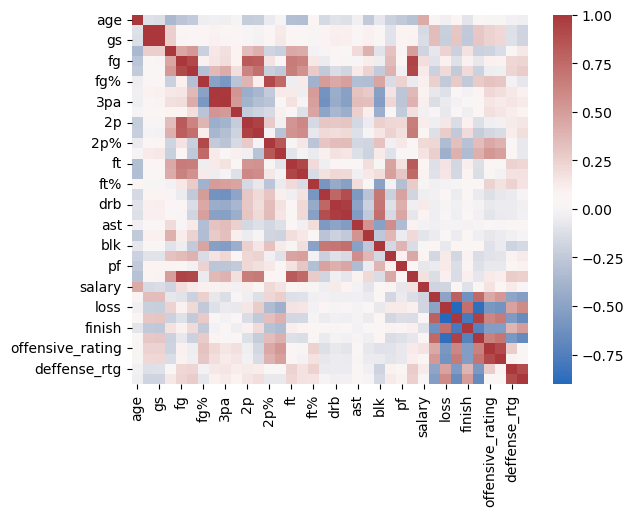

In [604]:
sns.heatmap(cor_map_wins, cmap='vlag')
plt.show()

why are all of the data not being brought back in when merging into the two tables

In [664]:
matched_wins['value_score'] = (
    0.15 * matched_wins['pts'] +
    0.08 * matched_wins['ast'] +
    0.05 * matched_wins['trb'] +
    0.08 * matched_wins['efg%'] +
    0.06 * (matched_wins['stl'] + matched_wins['blk']) -
    0.05 * matched_wins['tov'] +
    0.05 * matched_wins['mp'] +
    0.10 * matched_wins['win_loss_pctg'] 
)
#putting the season in the first column
matched_wins = matched_wins.reindex(
    columns=['season'] + [col for col in matched_wins.columns if col != 'season']
)

#scaling the max out of 10
scaler = MinMaxScaler(feature_range=(0, 10))
matched_wins['value_score_scaled'] = scaler.fit_transform(matched_wins[['value_score']])

In [666]:
matched_wins.describe()

,age,g,gs,mp,fg,fga,fg%,3p,3pa,3p%,...,win_loss_pctg,finish,simple_rating_system,offensive_rating,relative_offensive_rating,deffense_rtg,relative_defensive_rating,win_shares,value_score,value_score_scaled
count,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.00000,366.000000,366.000000,358.000000,...,353.000000,353.000000,353.000000,353.000000,353.000000,353.000000,353.000000,208.000000,353.000000,353.000000
mean,27.480874,71.855191,71.653005,35.715574,7.593169,15.939617,0.47947,1.136612,3.115301,0.313198,...,0.600901,2.147309,2.761416,108.093484,1.597734,104.979603,-1.516147,13.007692,5.757893,5.550181
std,3.698710,11.364126,11.466082,2.987160,1.588894,3.493358,0.04673,0.994904,2.523324,0.128542,...,0.129149,1.342424,3.817764,3.493230,3.002110,3.417815,3.067979,2.484141,0.827622,1.602398
min,20.000000,5.000000,5.000000,18.200000,2.900000,5.700000,0.35800,0.000000,0.000000,0.000000,...,0.183000,1.000000,-9.500000,97.000000,-7.000000,94.100000,-8.800000,10.000000,2.891280,0.000000
25%,25.000000,67.250000,67.000000,34.000000,6.525000,13.600000,0.44725,0.100000,0.400000,0.286000,...,0.514000,1.000000,0.020000,105.700000,-0.600000,102.800000,-3.800000,10.900000,5.191040,4.452671
50%,27.000000,76.000000,75.500000,35.950000,7.700000,16.100000,0.47300,1.100000,3.200000,0.343000,...,0.610000,2.000000,3.030000,108.300000,1.600000,104.700000,-1.400000,12.600000,5.757100,5.548646
75%,30.000000,80.000000,80.000000,37.700000,8.700000,18.300000,0.50475,1.800000,4.900000,0.383750,...,0.695000,3.000000,5.450000,110.900000,3.900000,107.100000,0.500000,14.500000,6.316100,6.630951
max,39.000000,82.000000,82.000000,43.100000,12.200000,27.200000,0.71400,5.100000,11.200000,1.000000,...,0.890000,7.000000,11.350000,115.600000,8.400000,114.400000,8.200000,20.300000,8.056180,10.000000


In [670]:
matched_wins.sort_values('value_score_scaled', ascending=False).head(50)


,season,player,pos,age,tm,g,gs,mp,fg,fga,...,simple_rating_system,offensive_rating,relative_offensive_rating,deffense_rtg,relative_defensive_rating,Playoffs,top_ws_player,win_shares,value_score,value_score_scaled
162,2005-2006,Kobe Bryant,SG,27,LAL,80,80,41.0,12.2,27.2,...,2.53,108.4,2.2,105.7,-0.5,Lost W. Conf. 1st Rnd.,K. Bryant,15.3,8.05618,10.000000
277,2005-2006,Allen Iverson,PG,30,PHI,72,72,43.1,11.3,25.3,...,-2.10,106.0,-0.2,108.1,1.9,NaN,A. Iverson,10.6,7.89066,9.679529
57,2005-2006,LeBron James,SF,21,CLE,79,79,42.5,11.1,23.1,...,2.17,107.8,1.6,105.4,-0.8,Lost E. Conf. Semis,L. James,16.3,7.79420,9.492768
264,2002-2003,Tracy McGrady,SG,23,ORL,75,74,39.4,11.1,24.2,...,-0.39,105.2,1.6,105.0,1.4,Lost E. Conf. 1st Rnd.,T. McGrady,16.1,7.66160,9.236036
262,2013-2014,Kevin Durant,SF,25,OKC,81,81,38.5,10.5,20.8,...,6.66,110.5,3.8,103.9,-2.8,Lost W. Conf. Finals,K. Durant,19.2,7.59680,9.110573
59,2007-2008,LeBron James,SF,23,CLE,75,74,40.4,10.6,21.9,...,-0.53,106.0,-1.5,106.4,-1.1,Lost E. Conf. Semis,L. James,15.2,7.59134,9.100002
69,2009-2010,LeBron James,SF,25,CLE,76,76,39.0,10.1,20.1,...,6.17,111.2,3.6,104.1,-3.5,Lost E. Conf. Semis,L. James,18.5,7.56200,9.043195
168,2006-2007,Kobe Bryant,SG,28,LAL,77,77,40.8,10.6,22.8,...,0.24,108.6,2.1,108.6,2.1,Lost W. Conf. 1st Rnd.,K. Bryant,13.0,7.53736,8.995489
201,2008-2009,Dwyane Wade,SG,27,MIA,79,79,38.6,10.8,22.0,...,0.49,107.8,-0.5,107.6,-0.7,Lost E. Conf. 1st Rnd.,D. Wade,14.7,7.44368,8.814111
125,2017-2018,James Harden,SG,28,HOU,72,72,35.4,9.0,20.1,...,8.21,115.2,7.4,106.7,-1.1,NaN,J. Harden,NaN,7.35078,8.634243
